In [2]:
from google.colab import drive
drive.mount("/content/drvie")

Mounted at /content/drvie


In [20]:
import pandas as pd 
inmuebles = pd.read_csv("/content/drvie/MyDrive/Inmersión en datos/inmuebles_bogota.csv") 
columnas = {"Baños": "Banos", "Área": "Area"} 
inmuebles = inmuebles.rename(columns=columnas) 

In [94]:
precio = inmuebles.Valor.str.split(expand=True)
inmuebles["Precio"] = (precio[1].str.replace(".","").astype("float"))/1000000
inmuebles["PrecioMetro"] = round(inmuebles.Precio/inmuebles.Area,2)
barrio_precio = inmuebles.groupby("Barrio").mean().PrecioMetro.to_frame().reset_index()
barrio_precio

<ipython-input-94-19dc380c6ab3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inmuebles["Precio"] = (precio[1].str.replace(".","").astype("float"))/1000000


,Barrio,PrecioMetro
0,Alameda,5.980000
1,Alhambra,4.327647
2,Andes Norte,6.050000
3,Antonio Nariño,3.530208
4,Barrancas,4.416667
...,...,...
144,Villa Maria,2.046154
145,Villas De Granada,3.169545
146,Villemar,3.988889
147,Zona Franca,2.960000


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

**Todos los barrios**

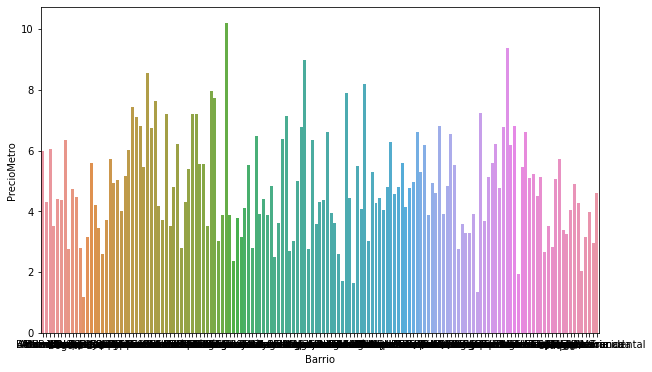

In [95]:
plt.figure(figsize=(10,6))
grafica = sns.barplot(data=barrio_precio, x='Barrio', y="PrecioMetro")
plt.show()

In [96]:
barrio_precio_top = barrio_precio.sort_values(by="PrecioMetro", ascending=False)
barrio_precio_top = barrio_precio_top[0:10]
barrio_precio_top

,Barrio,PrecioMetro
49,El Virrey,10.200000
124,Santa Ana,9.365000
70,La Merced,8.975000
28,Chico Norte,8.537300
86,Los Rosales,8.174100
45,El Refugio,7.958750
81,Las Nieves,7.886216
46,El Retiro,7.722105
30,Chico Reservado,7.613244
24,Chapinero,7.427620


**Top 10 barrios**

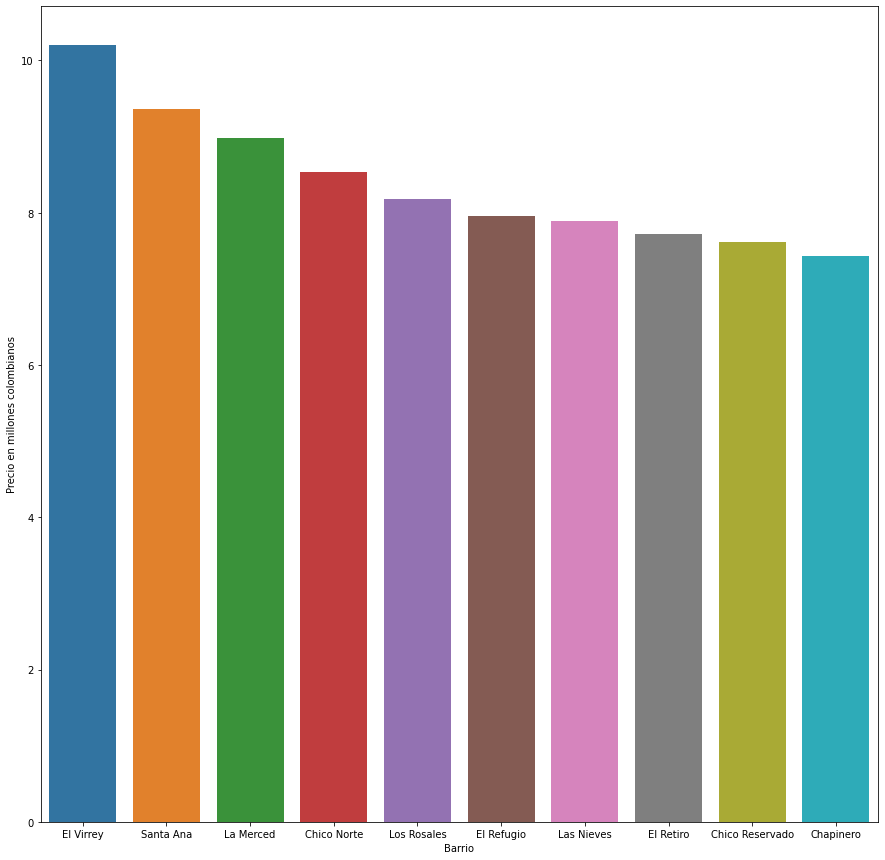

In [100]:
f, ax = plt.subplots(figsize=(15, 15))
grafica = sns.barplot(data=barrio_precio_top, x='Barrio', y="PrecioMetro")
ax.set(ylabel="Precio en millones colombianos", xlabel="Barrio")
plt.show()